 **<h2>AMAZON FOOD REVIEWS DATASET</h2>**



 **Aim & Goal**

* **Primary Goal**: To analyze customer feedback and behavior across food products on Amazon.
* **Research Uses**:

  * Sentiment analysis of food reviews
  * Recommendation systems for food items
  * Text classification (positive, neutral, negative)
  * Fake review detection
  * Market trend analysis in food categories

---


| Column Name               | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| `Id`                     | Unique identifier for each review entry                                     |
| `ProductId`              | Unique ID of the food product                                               |
| `UserId`                 | Unique ID of the reviewer                                                   |
| `ProfileName`            | Display name of the reviewer                                                |
| `HelpfulnessNumerator`   | Number of users who found the review helpful                                |
| `HelpfulnessDenominator` | Total number of users who voted on helpfulness                              |
| `Score`                  | Star rating (1 to 5) given by the customer                                  |
| `Time`                   | Timestamp of the review (usually in Unix time format)                       |
| `Summary`                | A short summary or title of the review                                      |
| `Text`                   | The full text of the customer review                                        |



**IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and array handling
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For enhanced statistical data visualization
from tqdm import tqdm  # For progress bars in loops
import nltk  # For natural language processing tasks
from nltk.corpus import stopwords  # For removing common stopwords in text
from nltk.stem import WordNetLemmatizer  # For reducing words to their base form
from nltk.tokenize import word_tokenize  # For splitting text into individual words
from bs4 import BeautifulSoup  # Import BeautifulSoup for parsing and navigating HTML/XML contentimport 
from wordcloud import WordCloud  # For generating word cloud visualizations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text to numerical features
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels
from sklearn.linear_model import LogisticRegression  # For logistic regression modeling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # For evaluating model performance with confusion matrix
from sklearn.metrics import classification_report, accuracy_score  # For detailed model evaluation metrics
from sklearn.model_selection import GridSearchCV  # For exhaustive hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # For ensemble-based classification
from sklearn.model_selection import RandomizedSearchCV, train_test_split  # For randomized hyperparameter tuning and data splitting
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Data splitting and hyperparameter tuning
from sklearn.metrics import roc_curve  # Calculates FPR and TPR for ROC curve
from sklearn.metrics import auc        # Computes area under the ROC curve
from sklearn.metrics import roc_auc_score  # Calculates overall AUC score for classification
from sklearn.preprocessing import label_binarize  # Converts multiclass labels to binary format
from itertools import cycle  # Cycles through colors for plotting multiple ROC curves


In [2]:
#LOADING DATASET
df=pd.read_csv(r"C:\Users\cheku\Downloads\archive (3)\Reviews.csv")

In [3]:
#length of the dataframe
len(df)

568454

In [4]:
#shape of the dataset number of rows and number of columns
print(df.shape)

(568454, 10)


In [5]:
#FIRST 50000 ROWS
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
#last 5 rows
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [7]:
#COLUMNS IN THE DATASET
print(df.columns)


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [8]:
#INFORMATION OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
#description 
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [10]:
#data types
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

**<h1>DATA PREPROCESSING</h1>**

**HANDLE MISSING VALUES**

In [11]:
#printing sum of null values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [12]:
#deleting null rows in profilename,summary
df.dropna(subset=['ProfileName', 'Summary'], inplace=True)

In [13]:
#checking once again null values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [14]:
#once again printing columns
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


**DUPLICATE REVIEWS**

In [15]:
#PRINTING DUPLICATES
duplicates = df[df.duplicated(subset=['UserId', 'ProductId'], keep=False)]
print(duplicates)

            Id   ProductId          UserId                   ProfileName  \
422        423  B000G6RYNE  A2NO1TXXS9T0EE                  BruteNStones   
423        424  B000G6RYNE  A1IRN1M05TPOVT  Sharon M. Helfand "Scrapper"   
425        426  B000G6RYNE  A1Y3XPZK9ZADFW                    albinocrow   
426        427  B000G6RYNE  A1Y3XPZK9ZADFW                    albinocrow   
429        430  B000G6RYNE  A1IRN1M05TPOVT  Sharon M. Helfand "Scrapper"   
...        ...         ...             ...                           ...   
568060  568061  B0030VJ8YU  A39WWOFLLOQC3L                       manda c   
568062  568063  B0030VJ8YU   ATIHDHZYNQ0EI  Kristen O'donnell "twinsmom"   
568067  568068  B0030VJ8YU   AL4269Y3JX766                       NewMama   
568128  568129  B0069AFIN4  A36MZGJVT077WL                        Alsand   
568144  568145  B0069AFIN4  A36MZGJVT077WL                        Alsand   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
422         

In [16]:
# Remove duplicate reviews by same user on the same product
df = df.drop_duplicates(subset=['UserId', 'ProductId'], keep='first')

print(f"Dataset shape after removing duplicates: {df.shape}")


Dataset shape after removing duplicates: (560751, 10)


In [17]:

print(df[['UserId', 'ProductId', 'Score']].head(50))


            UserId   ProductId  Score
0   A3SGXH7AUHU8GW  B001E4KFG0      5
1   A1D87F6ZCVE5NK  B00813GRG4      1
2    ABXLMWJIXXAIN  B000LQOCH0      4
3   A395BORC6FGVXV  B000UA0QIQ      2
4   A1UQRSCLF8GW1T  B006K2ZZ7K      5
5    ADT0SRK1MGOEU  B006K2ZZ7K      4
6   A1SP2KVKFXXRU1  B006K2ZZ7K      5
7   A3JRGQVEQN31IQ  B006K2ZZ7K      5
8   A1MZYO9TZK0BBI  B000E7L2R4      5
9   A21BT40VZCCYT4  B00171APVA      5
10  A3HDKO7OW0QNK4  B0001PB9FE      5
11  A2725IB4YY9JEB  B0009XLVG0      5
12   A327PCT23YH90  B0009XLVG0      1
13  A18ECVX2RJ7HUE  B001GVISJM      4
14  A2MUGFV2TDQ47K  B001GVISJM      5
15  A1CZX3CP8IKQIJ  B001GVISJM      5
16  A3KLWF6WQ5BNYO  B001GVISJM      2
17   AFKW14U97Z6QO  B001GVISJM      5
18  A2A9X58G2GTBLP  B001GVISJM      5
19  A3IV7CL2C13K2U  B001GVISJM      5
20  A1WO0KGLPR5PV6  B001GVISJM      5
21   AZOF9E17RGZH8  B001GVISJM      5
22   ARYVQL4N737A1  B001GVISJM      5
23   AJ613OLZZUG7V  B001GVISJM      5
24  A22P2J09NJ9HKE  B001GVISJM      5
25  A3FONPR0

**DATA CLEANING**

In [18]:
# Drop rows where either 'Text' or 'Summary' is missing to ensure valid reviews
df.dropna(subset=["Text", "Summary"], inplace=True)

# Calculate helpfulness ratio by dividing numerator by (denominator + 1) to avoid division by zero
df["HelpfulnessRatio"] = df["HelpfulnessNumerator"] / (df["HelpfulnessDenominator"] + 1)

# Convert Unix timestamp in 'Time' column to readable datetime format, coercing errors if any
df["Time"] = pd.to_datetime(df["Time"], errors="coerce", unit="s")

# Display the first few rows of the cleaned and updated DataFrame
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.50
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.00
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,0.50
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,0.75
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,0.00


**TEXT PREPROCESSING**

In [19]:

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Limit dataset (optional)
df = df.head(50000)

# Preprocessing function with HTML removal
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Tokenize text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply text preprocessing to 'Text' and 'Summary' columns
tqdm.pandas(desc='Preprocessing Text')
df['Preprocessed_Text'] = df['Text'].progress_apply(preprocess_text)

tqdm.pandas(desc='Preprocessing Summary')
df['Preprocessed_Summary'] = df['Summary'].progress_apply(preprocess_text)


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
Preprocessing Summary: 100%|████████████████████████████████████████████████████| 50000/50000 [00:58<00:00, 847.47it/s]


In [20]:
#printing dataframe after text preprocessing
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,Preprocessed_Text,Preprocessed_Summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.50,bought several vitality canned dog food produc...,good quality dog food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.00,product arrived labeled jumbo salted peanut pe...,advertised
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,0.50,confection around century light pillowy citrus...,delight say
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,0.75,looking secret ingredient robitussin believe f...,cough medicine
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,0.00,great taffy great price wide assortment yummy ...,great taffy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50693,50694,B003VMXZR4,A2HWTNX7I7U9A8,Snack lover,0,0,5,2011-09-10,Tasty Snack,I bought these chips because they contain plan...,0.00,bought chip contain plant sterol like much eat...,tasty snack
50694,50695,B008S5DDTE,A1UVHMM33J5ZVC,john j,0,0,5,2012-10-14,excellent coffee,Melitta coffee is an excellent coffee for dail...,0.00,melitta coffee excellent coffee daily use litt...,excellent coffee
50695,50696,B00615NM8U,ABL5H2HWEO3QA,Qingjie Guo,0,0,5,2011-11-08,Good taste. Health snack.,I am glad to find Hua Rou Chestnut on Amazon. ...,0.00,glad find hua rou chestnut amazon chestnut hua...,good taste health snack
50696,50697,B002ZHCC3O,A80SK99NL9PX6,"Michael Graham ""mg""",0,0,5,2012-04-19,Great for Workouts,I use Zipfizz before and during workouts to gi...,0.00,use zipfizz workout give jump start really wan...,great workout


**<h2>Feature Engineering</h2>**

In [21]:
# Compute the number of words in each preprocessed review text
df["TextLength"] = df["Preprocessed_Text"].apply(lambda x: len(x.split()))

# Normalize the review score to a 0–1 scale by dividing by the maximum score (5.0)
df["Normalized_Score"] = df["Score"] / 5.0

# Define a function to convert numerical scores into sentiment labels
def score_to_label(score):
    if score >= 4:
        return "positive"  # Scores 4 and 5 are considered positive
    elif score == 3:
        return "neutral"   # Score 3 is considered neutral
    else:
        return "negative"  # Scores 1 and 2 are considered negative

# Apply the sentiment labeling function to the 'Score' column
df["Sentiment"] = df["Score"].apply(score_to_label)

# Initialize a label encoder to convert sentiment labels into numeric format
label_encoder = LabelEncoder()

# Encode the sentiment labels as integers for model training
df["Sentiment_Label"] = label_encoder.fit_transform(df["Sentiment"])

# Display the first few rows of the updated DataFrame
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,Preprocessed_Text,Preprocessed_Summary,TextLength,Normalized_Score,Sentiment,Sentiment_Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.50,bought several vitality canned dog food produc...,good quality dog food,23,1.0,positive,2
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.00,product arrived labeled jumbo salted peanut pe...,advertised,18,0.2,negative,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,0.50,confection around century light pillowy citrus...,delight say,39,0.8,positive,2
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,0.75,looking secret ingredient robitussin believe f...,cough medicine,18,0.4,negative,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,0.00,great taffy great price wide assortment yummy ...,great taffy,13,1.0,positive,2


**<h1>EXPLORATORY DATA ANALYSIS</h1>**

In [22]:
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpfulnessRatio', 'Preprocessed_Text', 'Preprocessed_Summary',
       'TextLength', 'Normalized_Score', 'Sentiment', 'Sentiment_Label'],
      dtype='object')


**BAR PLOTS**

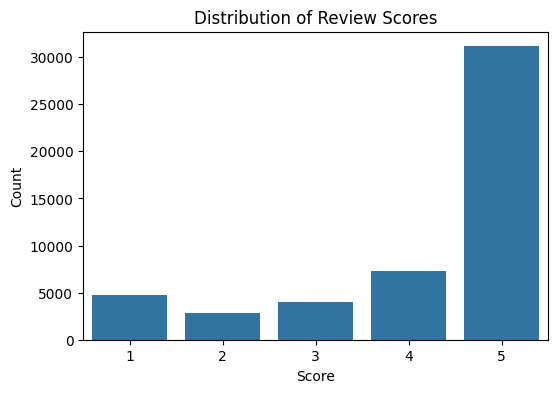

In [23]:
#This bar chart shows the count of reviews for each rating score in the dataset
# Rating distribution (warning-free)
plt.figure(figsize=(6,4))
sns.countplot(x="Score", data=df)  # removed palette
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()




**<h2>OBSERVATION</h2>**
people usually rate their food purchases positively with top ratings, and lower scores are less common.

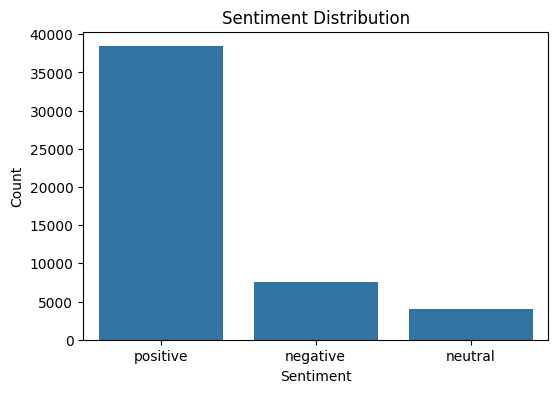

In [24]:
#This bar chart displays the number of reviews in each sentiment category (positive, neutral, negative).
#  Sentiment distribution (warning-free)
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df)  # removed palette
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


**<h2>OBSERVATION</h2>**
customers mostly give positive feedback, with negative and neutral reviews being much less common

**HISTOGRAM**

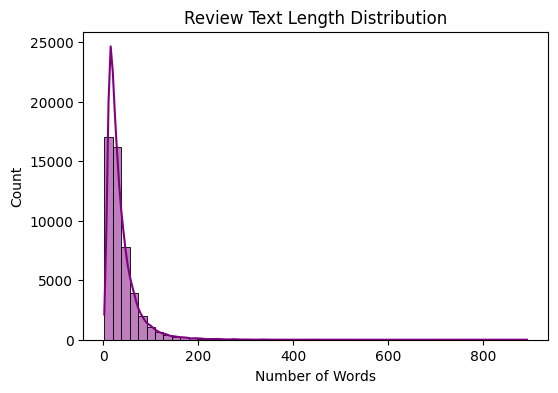

In [25]:
#This histogram shows the distribution of review lengths (in words) across all reviews, with a KDE curve to visualize density
# Text length distribution
plt.figure(figsize=(6,4))
sns.histplot(df["TextLength"], bins=50, kde=True, color="purple")
plt.title("Review Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

**<h2>OBSERVATION</h2>**
Most reviews are very short—less than 50 words.
As the number of words increases, the number of reviews drops very fast.
Very few reviews are longer than 200 words.In summary, almost everyone writes short reviews, with long reviews being very rare.

In [26]:
!pip install wordcloud


**<h2>Word Cloud</h2>**

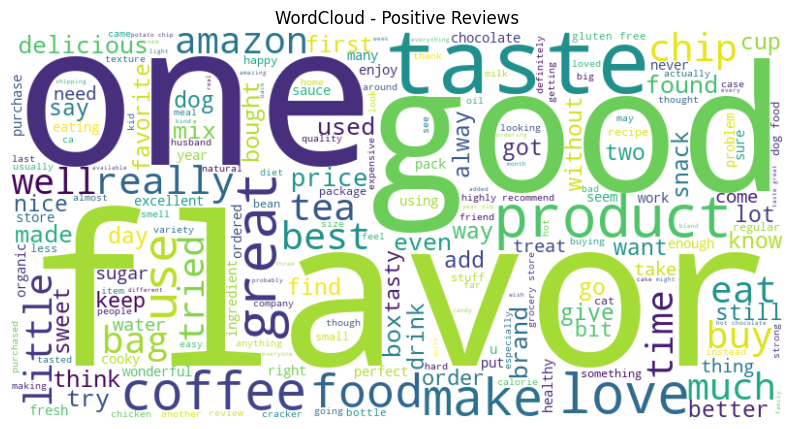

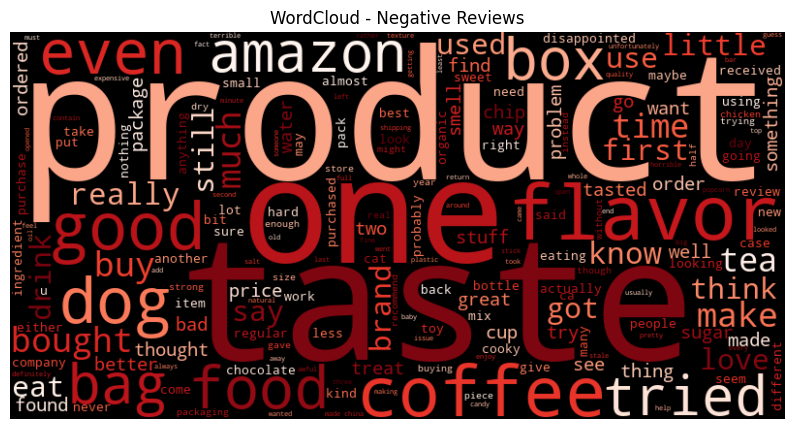

In [27]:
#These word clouds visualize the most frequent words in positive and negative reviews, highlighting key terms contributing to each sentiment.

# Positive WordCloud
positive_text = " ".join(df[df["Sentiment"]=="positive"]["Preprocessed_Text"].head(5000))
wc_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10,6))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()

# Negative WordCloud
negative_text = " ".join(df[df["Sentiment"]=="negative"]["Preprocessed_Text"].head(5000))
wc_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)
plt.figure(figsize=(10,6))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Negative Reviews")
plt.show()


**<h2>OBSERVATION</h2>**
Both positive and negative reviews discuss similar product-related terms, but their context differs: positive reviews focus on 
desirable qualities and satisfaction,
while negative reviews express problems or unmet expectations.
Sensory and emotional words dominate positive reviews, 
whereas negative reviews tend to center on actions and trial, reflecting attempts and subsequent disappointment.

**LINE CHART**

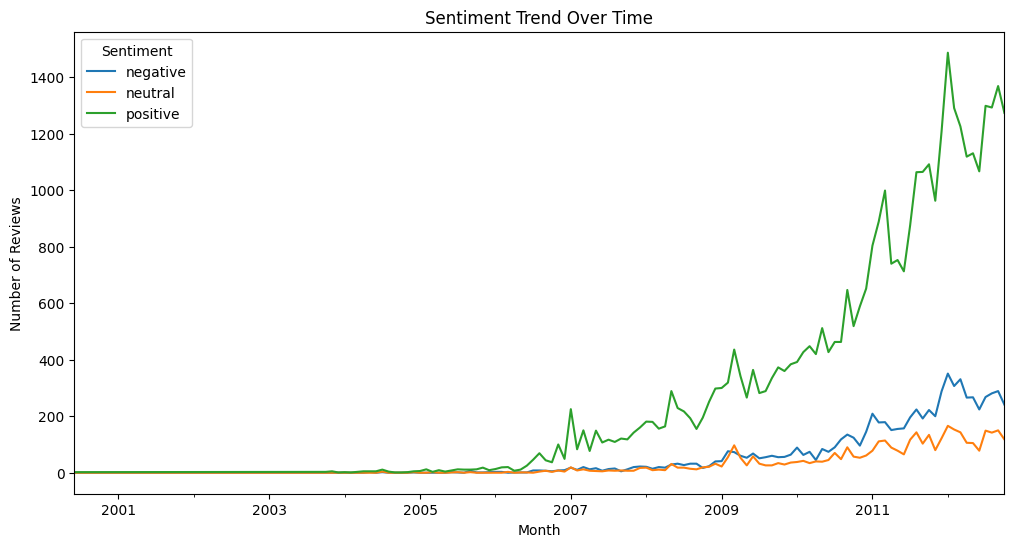

In [28]:
#This line chart shows how the number of positive, neutral, and negative reviews changes over time on a monthly basis
#Sentiment Trend Over Time 
df_time = df.dropna(subset=["Time"]) 
df_time["Month"] = df_time["Time"].dt.to_period("M") 
trend = df_time.groupby(["Month","Sentiment"]).size().unstack(fill_value=0) 
trend.plot(figsize=(12,6)) 
plt.title("Sentiment Trend Over Time")
plt.ylabel("Number of Reviews")
plt.show()

**<h2>OBSERVATION</h2>**
Positive reviews have consistently increased and become dominant, especially after 2007, reaching over 1400 reviews per month by 2011.
Neutral and negative reviews also show growth but remain much lower than positive reviews throughout the period.
The biggest growth in review volume across all sentiments occurs from 2007 onward, parallel to Amazon’s expansion and likely increased customer engagement.
There are periodic spikes in all sentiment categories, possibly due to events, new product launches, or marketing campaigns.

**<h2>TF-IDF Vectorization</h2>**

In [29]:
# Extract the preprocessed review text as input features
X = df["Preprocessed_Text"]

# Extract the encoded sentiment labels as target variable
y = df["Sentiment_Label"]

# Initialize a TF-IDF vectorizer to convert text into numerical features, limiting to top 5000 terms
vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the text data and transform it into a sparse matrix of TF-IDF features
X_tfidf = vectorizer.fit_transform(X)

# Print the shape of the resulting TF-IDF feature matrix (rows = samples, columns = features)
print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (50000, 5000)


**<h1>Data Splitting</h1>**

In [30]:
# Split the TF-IDF features and sentiment labels into training and test sets (80% train, 20% test) with reproducible shuffling
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

**<h1>Train Logistic Regression</h1>**

In [31]:
# Initialize a Logistic Regression model with increased max iterations to ensure convergence(it has minimized the loss function and stopped improving significantly with further iterations)
model = LogisticRegression(max_iter=1000)

# Train the model using the TF-IDF features and sentiment labels from the training set
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
# Use the trained Logistic Regression model to predict sentiment labels on the test set
y_pred = model.predict(X_test)

# Print the overall accuracy of the model on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display a detailed classification report including precision, recall, and F1-score for each sentiment class
print(classification_report(y_test, y_pred, target_names=['negative','neutral','positive']))

Accuracy: 0.8456
              precision    recall  f1-score   support

    negative       0.73      0.61      0.67      1508
     neutral       0.47      0.12      0.19       815
    positive       0.87      0.97      0.92      7677

    accuracy                           0.85     10000
   macro avg       0.69      0.57      0.59     10000
weighted avg       0.82      0.85      0.82     10000



<h1>Heat Map</h1>

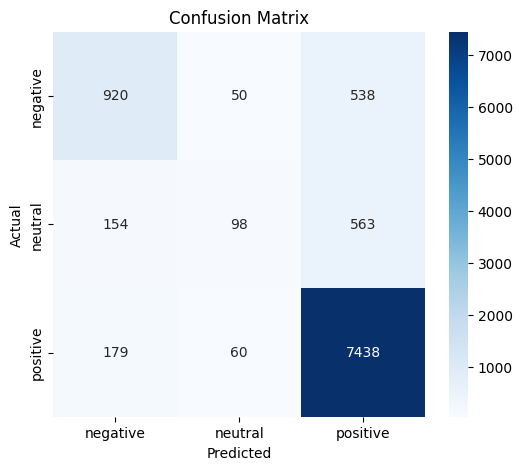

In [33]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<h1>Sample Prediction</h1>

In [45]:
# Sample review
sample_review = ["taste is good"]

# Preprocess the review (use your preprocessing function, not column name)
sample_review_prep = preprocess_text(sample_review[0])  

# Transform to TF-IDF (needs a list)
sample_tfidf = vectorizer.transform([sample_review_prep])

# Predict sentiment
pred = model.predict(sample_tfidf)
print("Sample Prediction:", label_encoder.inverse_transform(pred)[0])


Sample Prediction: positive


<h1>Hyper Parameter Tuning</h1>

**GRID SEARCH**

In [39]:
# param_grid is a dictionary of hyperparameter values that GridSearchCV tests to find the best model settings

# Define parameter grid for Logistic Regression:
# 'C' controls regularization strength (lower = stronger regularization)
# 'penalty' specifies the type of regularization: 'l1' for Lasso, 'l2' for Ridge
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [40]:
# Use 'saga' solver with multinomial loss for multi-class classification
# 'max_iter=1000' ensures enough iterations for convergence
# 'multi_class="multinomial"' enables softmax-based loss for multi-class problems
# 'solver="saga"' supports both L1 and L2 regularization and is efficient for large datasets
lr = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='saga'
)

In [41]:
# Create a GridSearchCV object to perform exhaustive hyperparameter tuning for Logistic Regression
grid = GridSearchCV(
    estimator=lr,           # Logistic Regression model with saga solver and multinomial loss
    param_grid=param_grid,  # Dictionary of hyperparameters to test (C and penalty)
    cv=3,                   # Use 3-fold cross-validation to evaluate each parameter combination
    scoring='accuracy',     # Optimize for classification accuracy
    n_jobs=-1               # Use all available CPU cores for parallel processing
)

In [42]:
# Optional: smaller subset for faster tuning
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=0.2, random_state=42
)



In [43]:
# Fit grid search
grid.fit(X_train_sample, y_train_sample)


C:\Users\cheku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,estimator,LogisticRegre...solver='saga')
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [44]:
# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.8153737440734387


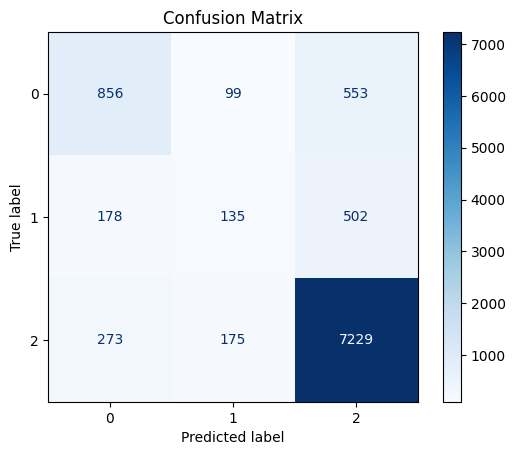

In [45]:

# Predict on the test set
y_pred = grid.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


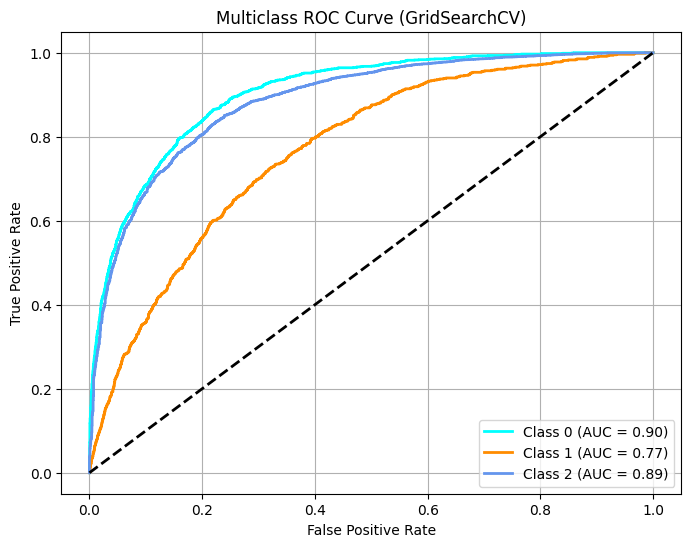

Macro-Averaged ROC AUC (GridSearchCV): 0.8526644727050848


In [46]:

# Step 1: Predict class probabilities on test set
y_proba_grid = grid.predict_proba(X_test)

# Step 2: Get class labels from the best model
classes_grid = grid.best_estimator_.classes_

# Step 3: Convert true labels to binary format for ROC calculation
y_test_bin_grid = label_binarize(y_test, classes=classes_grid)
n_classes_grid = y_test_bin_grid.shape[1]  # Number of classes

# Step 4: Calculate ROC curve and AUC for each class
fpr_grid, tpr_grid, roc_auc_grid = {}, {}, {}
for i in range(n_classes_grid):
    fpr_grid[i], tpr_grid[i], _ = roc_curve(y_test_bin_grid[:, i], y_proba_grid[:, i])
    roc_auc_grid[i] = auc(fpr_grid[i], tpr_grid[i])

# Step 5: Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])  # Color palette
for i, color in zip(range(n_classes_grid), colors):
    plt.plot(fpr_grid[i], tpr_grid[i], color=color, lw=2,
             label=f'Class {classes_grid[i]} (AUC = {roc_auc_grid[i]:.2f})')

# Step 6: Add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Step 7: Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (GridSearchCV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 8: Print macro-averaged AUC score
macro_auc_grid = roc_auc_score(y_test_bin_grid, y_proba_grid, average='macro', multi_class='ovr')
print("Macro-Averaged ROC AUC (GridSearchCV):", macro_auc_grid)

**RANDOM SEARCH**

In [47]:

# Optional: use a smaller subset of training data for faster tuning
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=0.2, random_state=42
)



In [48]:
# Define Logistic Regression model with saga solver for L1/L2 support
model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000, random_state=42)


In [49]:

#  Define hyperparameter distribution for randomized search
param_dist = {
    'C': np.logspace(-3, 2, 10),         # Regularization strength from 0.001 to 100
    'penalty': ['l1', 'l2']              # Type of regularization
}


In [50]:
#  Create RandomizedSearchCV object for efficient hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,        # Number of random combinations to try
    cv=5,             # 5-fold cross-validation
    random_state=42,
    n_jobs=-1         # Use all available CPU cores
)


In [51]:

# Fit randomized search on the sampled training data
random_search.fit(X_train_sample, y_train_sample)


C:\Users\cheku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,estimator,LogisticRegre...solver='saga')
,param_distributions,"{'C': array([1.0000...00000000e+02]), 'penalty': ['l1', 'l2']}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [52]:

#  Print best parameters and cross-validation accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Best Parameters: {'penalty': 'l2', 'C': np.float64(7.742636826811277)}
Best Cross-Validation Accuracy: 0.8135


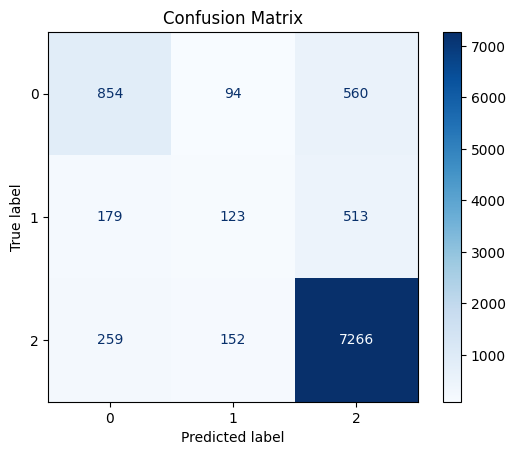

In [53]:


#  Predict on the full test set using the best tuned model
y_pred = random_search.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

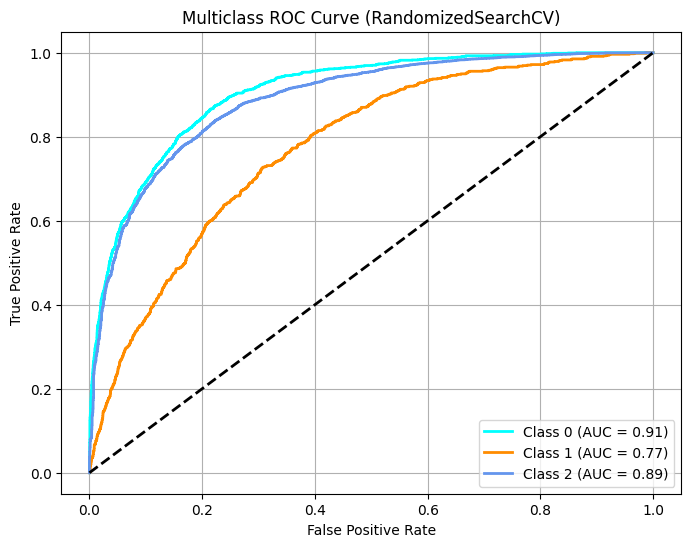

Macro-Averaged ROC AUC (RandomizedSearchCV): 0.8562419672094498


In [54]:

# Step 1: Get predicted probabilities for each class
y_proba_random = random_search.predict_proba(X_test)

# Step 2: Get the class labels from the best model
classes_random = random_search.best_estimator_.classes_

# Step 3: Convert true labels to binary format (needed for ROC curve)
y_test_bin_random = label_binarize(y_test, classes=classes_random)
n_classes_random = y_test_bin_random.shape[1]  # Total number of classes

# Step 4: Calculate ROC curve and AUC for each class
fpr_random = {}  # False Positive Rate
tpr_random = {}  # True Positive Rate
roc_auc_random = {}  # Area Under Curve
for i in range(n_classes_random):
    fpr_random[i], tpr_random[i], _ = roc_curve(y_test_bin_random[:, i], y_proba_random[:, i])
    roc_auc_random[i] = auc(fpr_random[i], tpr_random[i])

# Step 5: Plot ROC curves for all classes
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])  # Color for each class
for i, color in zip(range(n_classes_random), colors):
    plt.plot(fpr_random[i], tpr_random[i], color=color, lw=2,
             label=f'Class {classes_random[i]} (AUC = {roc_auc_random[i]:.2f})')

# Step 6: Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Step 7: Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (RandomizedSearchCV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 8: Print overall macro-average AUC score
macro_auc_random = roc_auc_score(y_test_bin_random, y_proba_random, average='macro', multi_class='ovr')
print("Macro-Averaged ROC AUC (RandomizedSearchCV):", macro_auc_random)

**<h2>OBSERVATION</h2>**

RandomizedSearchCV demonstrated strong performance during hyperparameter tuning.



<h2>FINAL VIEW</h2>

**Preprocessing & Feature Engineering**

* Removed missing values (`Text` and `Summary`)
* removing duplicates
* Created **HelpfulnessRatio**: `HelpfulnessNumerator / (HelpfulnessDenominator + 1)`
* Converted Unix `Time` to readable date format
* Text preprocessing:

  * Lowercasing
  * Removing punctuation and numbers
  * Stopword removal
  * Lemmatization
  * removing html tags
* Created features:

  * `TextLength` → number of words in review
  * `Normalized_Score` → `Score / 5`
  * `Sentiment` → Positive / Neutral / Negative
  * `Sentiment_Label` → Encoded label for ML

---

**Exploratory Data Analysis (EDA)**

* **Rating Distribution:** Count plot of `Score`
* **Sentiment Distribution:** Count plot of `Sentiment`
* **Review Length Distribution:** Histogram of `TextLength`
* **WordClouds:** Top words in positive vs negative reviews
* **Sentiment Trend Over Time:** Line chart showing how sentiments evolve monthly

---

**Modeling**

* **Feature Extraction:** TF-IDF Vectorization (`max_features=5000`)
* **Algorithms Tested:**

  * Logistic Regression
  * Random Forest
* **Hyperparameter Tuning:**

  * RandomizedSearchCV (Random Forest)
  * GridSearchCV (Logistic Regression) optional
* **Evaluation Metrics:**

  * Accuracy
  * Classification report (precision, recall, F1-score)
  * Confusion matrix
  * AUC-ROC Curve
---
 
